In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\fUJITSU\Downloads\movies.csv')

In [2]:
# Now let's take to look at the data
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [3]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [4]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


<Axes: >

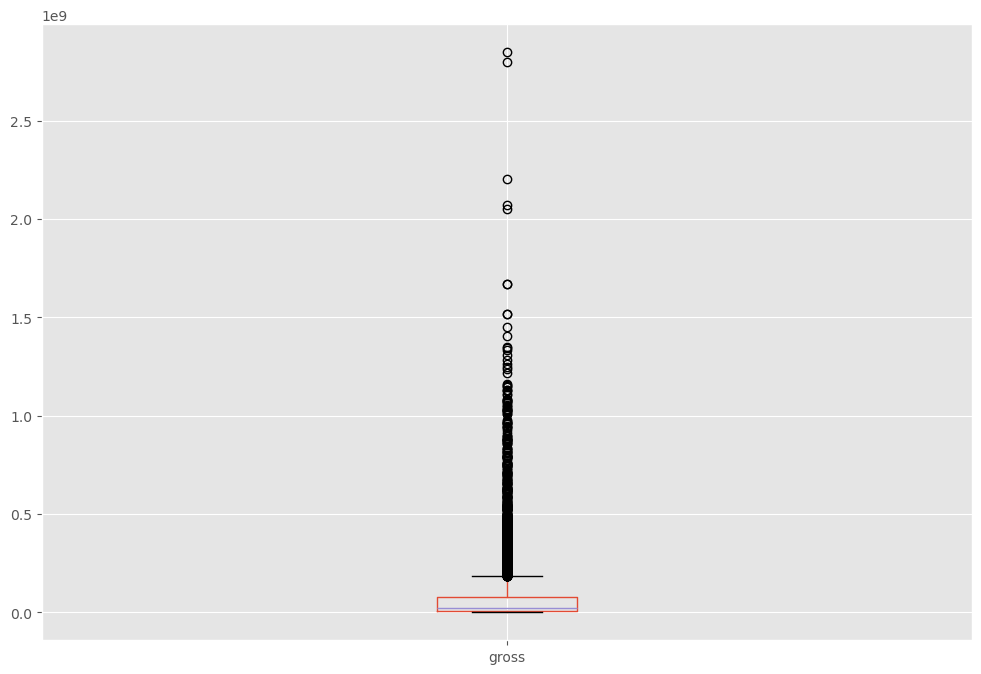

In [5]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [6]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [7]:
# Order our Data a little bit to see

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


<Axes: xlabel='gross', ylabel='budget'>

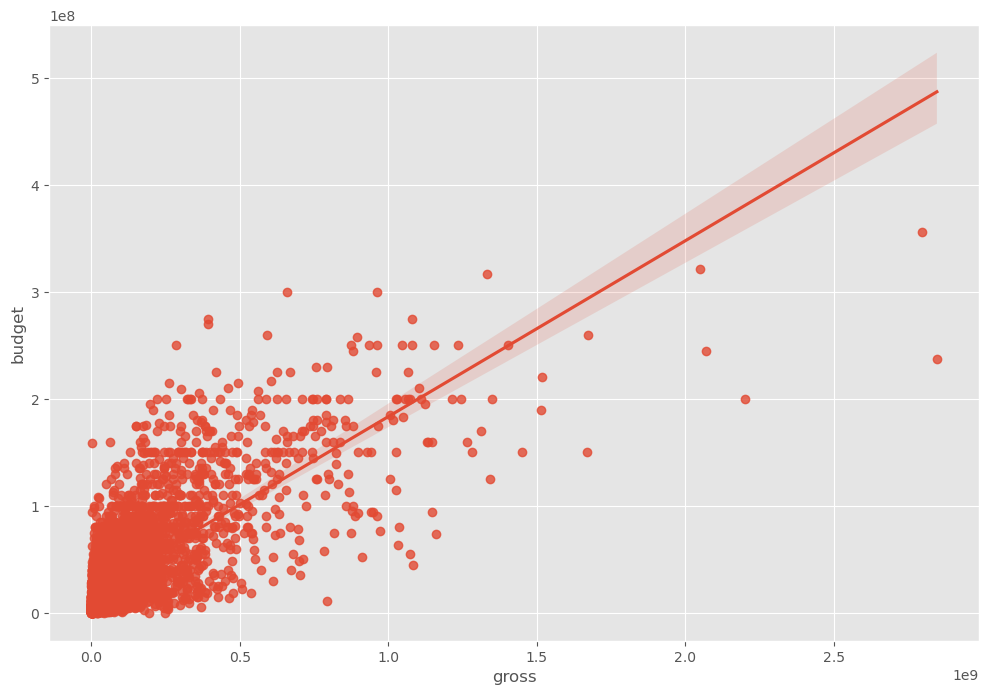

In [8]:
sns.regplot(x="gross", y="budget", data=df)

<Axes: xlabel='score', ylabel='gross'>

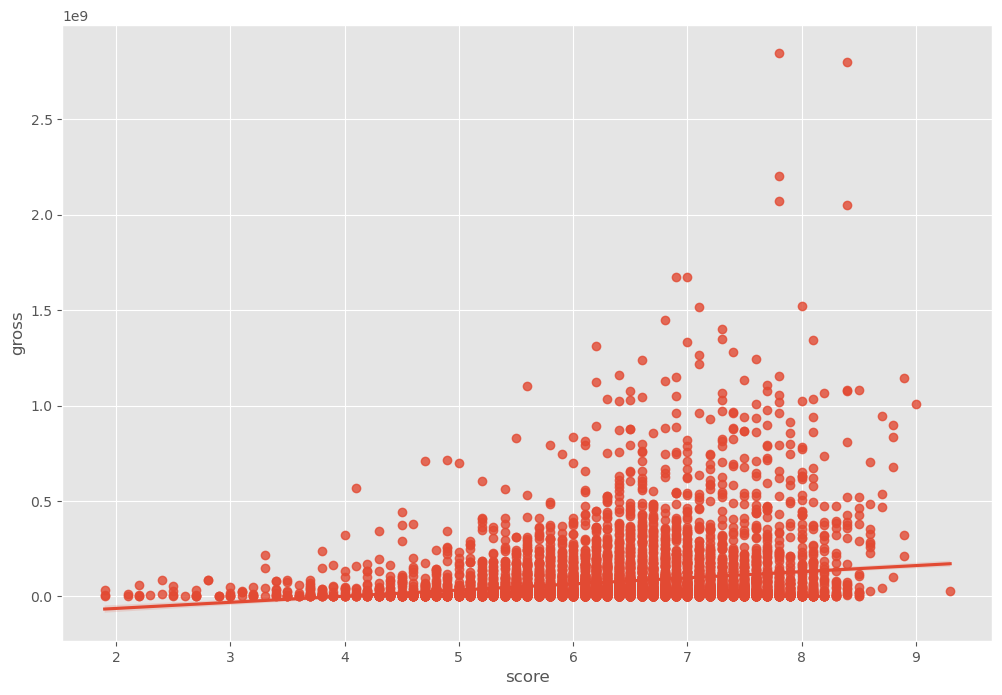

In [9]:

sns.regplot(x="score", y="gross", data=df)

In [10]:
# 1. Manually set the order of the numeric columns
df_reordered = df[['budget', 'gross', 'runtime', 'score', 'votes', 'year']]

# 2. Run the correlation on this new reordered version
correlation_matrix = df_reordered.corr(method='pearson')

# 3. Display the matrix
correlation_matrix

,budget,gross,runtime,score,votes,year
budget,1.000000,0.740395,0.320447,0.076254,0.442429,0.329321
gross,0.740395,1.000000,0.245216,0.186258,0.630757,0.257486
runtime,0.320447,0.245216,1.000000,0.399451,0.309212,0.120811
score,0.076254,0.186258,0.399451,1.000000,0.409182,0.097995
votes,0.442429,0.630757,0.309212,0.409182,1.000000,0.222945
year,0.329321,0.257486,0.120811,0.097995,0.222945,1.000000


In [11]:

# Correlation Matrix between all numeric columns
df_reordered.corr(method='pearson')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.740395,0.320447,0.076254,0.442429,0.329321
gross,0.740395,1.000000,0.245216,0.186258,0.630757,0.257486
runtime,0.320447,0.245216,1.000000,0.399451,0.309212,0.120811
score,0.076254,0.186258,0.399451,1.000000,0.409182,0.097995
votes,0.442429,0.630757,0.309212,0.409182,1.000000,0.222945
year,0.329321,0.257486,0.120811,0.097995,0.222945,1.000000


In [12]:
df_reordered.corr(method='kendall')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.512637,0.235483,-0.000566,0.353702,0.224120
gross,0.512637,1.000000,0.168933,0.086046,0.548899,0.200618
runtime,0.235483,0.168933,1.000000,0.283611,0.198240,0.097184
score,-0.000566,0.086046,0.283611,1.000000,0.300115,0.067652
votes,0.353702,0.548899,0.198240,0.300115,1.000000,0.331465
year,0.224120,0.200618,0.097184,0.067652,0.331465,1.000000


In [13]:
df_reordered.corr(method='spearman')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.693670,0.336370,-0.001403,0.502466,0.317336
gross,0.693670,1.000000,0.246243,0.126116,0.742050,0.293084
runtime,0.336370,0.246243,1.000000,0.399857,0.290159,0.142977
score,-0.001403,0.126116,0.399857,1.000000,0.428138,0.099045
votes,0.502466,0.742050,0.290159,0.428138,1.000000,0.469829
year,0.317336,0.293084,0.142977,0.099045,0.469829,1.000000


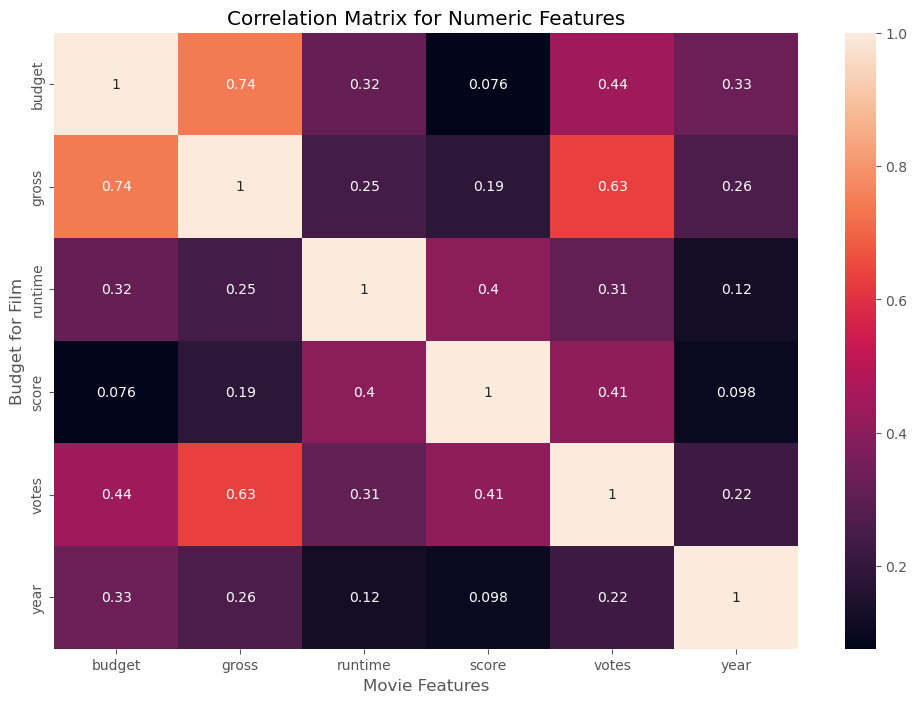

In [14]:
# You must add numeric_only=True to ignore the movie titles/genres
# Updated Heatmap code
# 1. Calculate the correlation on your reordered data
correlation_matrix = df_reordered.corr(method='pearson')

# 2. Create the heatmap
sns.heatmap(correlation_matrix, annot=True)

# 3. ADD THE TITLE HERE
plt.title("Correlation Matrix for Numeric Features")

# 4. Add labels for the X and Y axes (optional but helpful)
plt.xlabel("Movie Features")
plt.ylabel("Budget for Film")

# 5. Display the plot
plt.show()

In [15]:
# Looks at company

df = df[['budget', 'company', 'country', 'director', 'genre', 'gross', 'name', 'rating', 'released', 'runtime', 'score', 'star', 'votes', 'writer', 'year']]
# 2. Now run df.head()
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000.0,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772.0,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980
1,4500000.0,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106.0,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980
2,18000000.0,Lucasfilm,United States,Irvin Kershner,Action,538375067.0,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980
3,3500000.0,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539.0,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980
4,6000000.0,Orion Pictures,United States,Harold Ramis,Comedy,39846344.0,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980


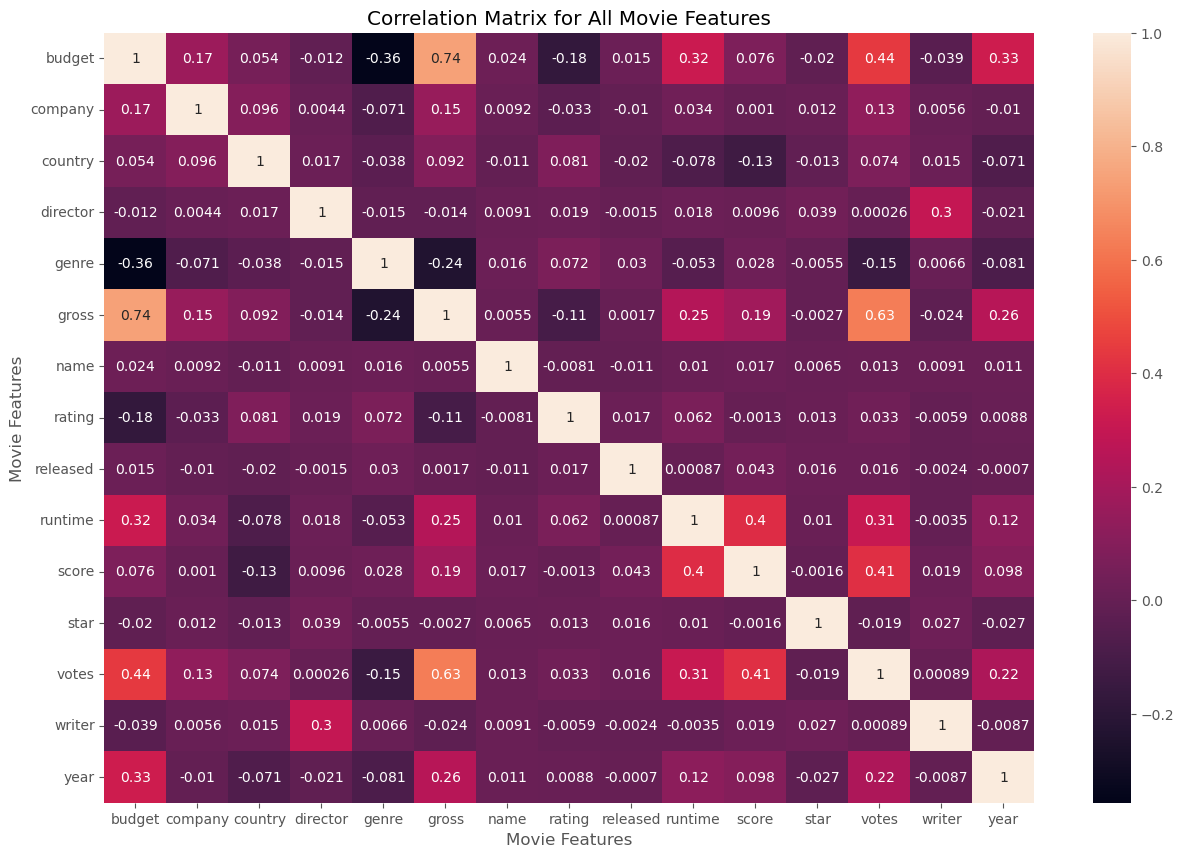

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create the numerized version again (to be safe)
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

# 2. Calculate correlation
correlation_matrix = df_numerized.corr(method='pearson')

# 3. Create the Heatmap
# We set the figure size larger so the numbers are easier to read
plt.figure(figsize=(15,10)) 

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Matrix for All Movie Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

In [17]:
df_numerized.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000.0,2319,54,2589,6,46998772.0,6587,6,1705,146.0,8.4,1047,927000.0,4014,1980
1,4500000.0,731,55,2269,1,58853106.0,5573,6,1492,104.0,5.8,327,65000.0,1632,1980
2,18000000.0,1540,55,1111,0,538375067.0,5142,4,1771,124.0,8.7,1745,1200000.0,2567,1980
3,3500000.0,1812,55,1301,4,83453539.0,286,4,1492,88.0,7.7,2246,221000.0,2000,1980
4,6000000.0,1777,55,1054,4,39846344.0,1027,6,1543,98.0,7.3,410,108000.0,521,1980


In [18]:
# 1. Take the matrix and "unstack" it into a list
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()

# 2. Sort them so the highest numbers are at the top
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

# 3. Filter to see only the strong ones (greater than 0.5)
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

votes     gross       0.630757
gross     votes       0.630757
          budget      0.740395
budget    gross       0.740395
          budget      1.000000
rating    rating      1.000000
votes     votes       1.000000
star      star        1.000000
score     score       1.000000
runtime   runtime     1.000000
released  released    1.000000
name      name        1.000000
gross     gross       1.000000
genre     genre       1.000000
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
dtype: float64


In [19]:
# 1. Create the numerized version first (making sure it's all numbers)
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

# 2. Manually set the order to match Alex's Alphabetical Order
# (budget, company, country, director, genre, gross, name, rating, released, runtime, score, star, votes, writer, year)
alex_column_order = ['budget', 'company', 'country', 'director', 'genre', 'gross', 'name', 'rating', 'released', 'runtime', 'score', 'star', 'votes', 'writer', 'year']

df_numerized = df_numerized[alex_column_order]

# 3. Now run the correlation
correlation_matrix = df_numerized.corr(method='pearson')

# 4. Show the table
correlation_matrix

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
budget,1.000000,0.173214,0.054063,-0.012272,-0.356564,0.740395,0.023970,-0.176002,0.014683,0.320447,0.076254,-0.019589,0.442429,-0.039451,0.329321
company,0.173214,1.000000,0.095548,0.004404,-0.071067,0.154840,0.009211,-0.032943,-0.010474,0.034402,0.001030,0.012442,0.133204,0.005646,-0.010431
country,0.054063,0.095548,1.000000,0.017490,-0.037615,0.092129,-0.010737,0.081244,-0.020427,-0.078412,-0.133348,-0.012998,0.073625,0.015343,-0.070938
director,-0.012272,0.004404,0.017490,1.000000,-0.015258,-0.014441,0.009079,0.019483,-0.001478,0.017624,0.009559,0.039234,0.000260,0.299067,-0.020795
genre,-0.356564,-0.071067,-0.037615,-0.015258,1.000000,-0.235650,0.016355,0.072423,0.029822,-0.052711,0.027965,-0.005477,-0.145307,0.006567,-0.081261
gross,0.740395,0.154840,0.092129,-0.014441,-0.235650,1.000000,0.005533,-0.107339,0.001659,0.245216,0.186258,-0.002717,0.630757,-0.023519,0.257486
name,0.023970,0.009211,-0.010737,0.009079,0.016355,0.005533,1.000000,-0.008069,-0.011311,0.010392,0.017097,0.006472,0.013088,0.009081,0.011453
rating,-0.176002,-0.032943,0.081244,0.019483,0.072423,-0.107339,-0.008069,1.000000,0.016613,0.062145,-0.001314,0.013405,0.033225,-0.005921,0.008779
released,0.014683,-0.010474,-0.020427,-0.001478,0.029822,0.001659,-0.011311,0.016613,1.000000,0.000868,0.042788,0.015777,0.016097,-0.002404,-0.000695
runtime,0.320447,0.034402,-0.078412,0.017624,-0.052711,0.245216,0.010392,0.062145,0.000868,1.000000,0.399451,0.010174,0.309212,-0.003511,0.120811


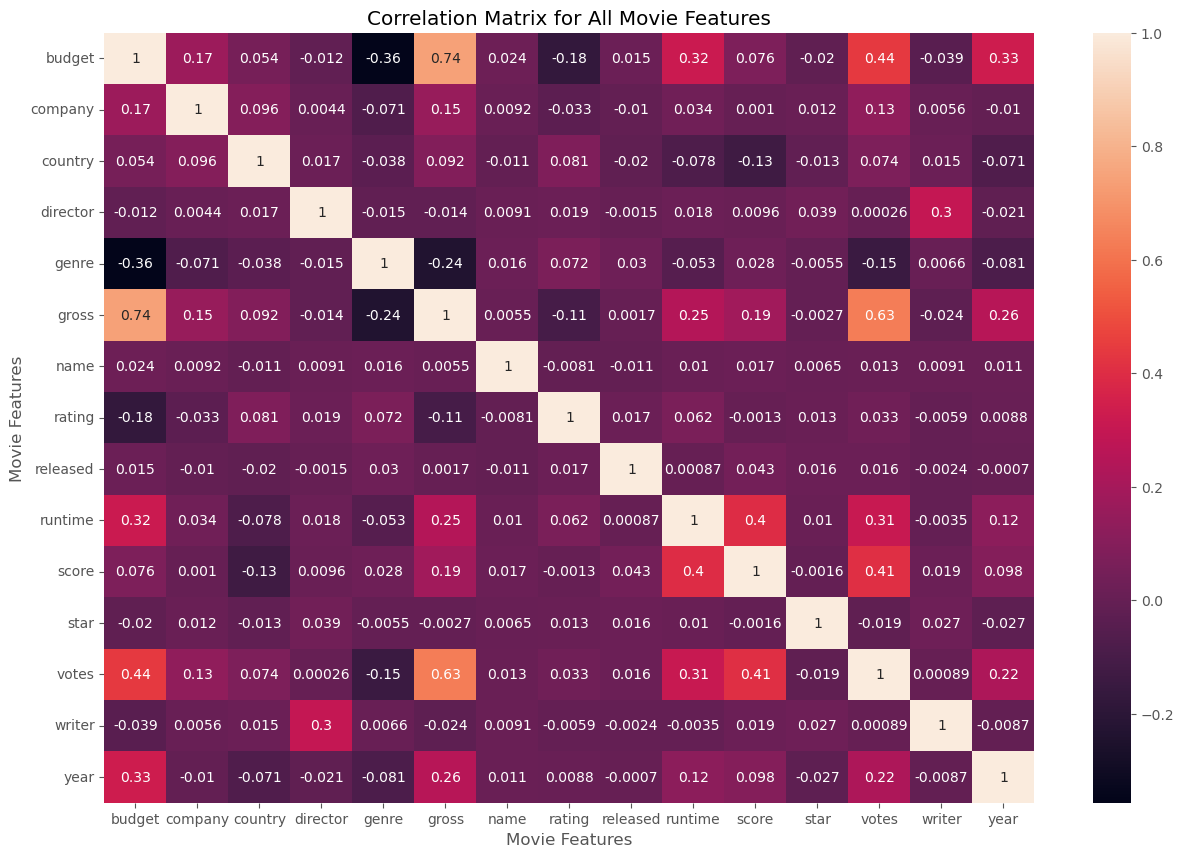

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a large figure size so you can see all the labels
plt.figure(figsize=(15,10)) 

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Matrix for All Movie Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

In [21]:
df_numerized.corr()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
budget,1.000000,0.173214,0.054063,-0.012272,-0.356564,0.740395,0.023970,-0.176002,0.014683,0.320447,0.076254,-0.019589,0.442429,-0.039451,0.329321
company,0.173214,1.000000,0.095548,0.004404,-0.071067,0.154840,0.009211,-0.032943,-0.010474,0.034402,0.001030,0.012442,0.133204,0.005646,-0.010431
country,0.054063,0.095548,1.000000,0.017490,-0.037615,0.092129,-0.010737,0.081244,-0.020427,-0.078412,-0.133348,-0.012998,0.073625,0.015343,-0.070938
director,-0.012272,0.004404,0.017490,1.000000,-0.015258,-0.014441,0.009079,0.019483,-0.001478,0.017624,0.009559,0.039234,0.000260,0.299067,-0.020795
genre,-0.356564,-0.071067,-0.037615,-0.015258,1.000000,-0.235650,0.016355,0.072423,0.029822,-0.052711,0.027965,-0.005477,-0.145307,0.006567,-0.081261
gross,0.740395,0.154840,0.092129,-0.014441,-0.235650,1.000000,0.005533,-0.107339,0.001659,0.245216,0.186258,-0.002717,0.630757,-0.023519,0.257486
name,0.023970,0.009211,-0.010737,0.009079,0.016355,0.005533,1.000000,-0.008069,-0.011311,0.010392,0.017097,0.006472,0.013088,0.009081,0.011453
rating,-0.176002,-0.032943,0.081244,0.019483,0.072423,-0.107339,-0.008069,1.000000,0.016613,0.062145,-0.001314,0.013405,0.033225,-0.005921,0.008779
released,0.014683,-0.010474,-0.020427,-0.001478,0.029822,0.001659,-0.011311,0.016613,1.000000,0.000868,0.042788,0.015777,0.016097,-0.002404,-0.000695
runtime,0.320447,0.034402,-0.078412,0.017624,-0.052711,0.245216,0.010392,0.062145,0.000868,1.000000,0.399451,0.010174,0.309212,-0.003511,0.120811


In [22]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

budget  budget      1.000000
        company     0.173214
        country     0.054063
        director   -0.012272
        genre      -0.356564
                      ...   
year    score       0.097995
        star       -0.027242
        votes       0.222945
        writer     -0.008656
        year        1.000000
Length: 225, dtype: float64

In [23]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre     budget     -0.356564
budget    genre      -0.356564
genre     gross      -0.235650
gross     genre      -0.235650
rating    budget     -0.176002
                        ...   
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
Length: 225, dtype: float64

In [24]:
high_corr = sorted_pairs[(sorted_pairs) >0.5]
high_corr


votes     gross       0.630757
gross     votes       0.630757
          budget      0.740395
budget    gross       0.740395
          budget      1.000000
rating    rating      1.000000
votes     votes       1.000000
star      star        1.000000
score     score       1.000000
runtime   runtime     1.000000
released  released    1.000000
name      name        1.000000
gross     gross       1.000000
genre     genre       1.000000
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
dtype: float64

In [25]:
# votes and budgets have the highest correlation to gross earnings
# company has low correlation
# I was wrong